# Adults and Children Density Model

Let's model a simple situation in which there are two populations, one that
sustains the other. The population is composed by adults and children and
evolves by discrete steps of 1 year.

- $\alpha$ is the net growth rate of adults.
- every year each adult generates $\beta$ children.
- children become adults after $3$ years
- children do not die but adults do.

The aim is to build a simple system of recurrence relations that describes this
system.

We have a situation where adults reproduce, increasing the children population
density and die at some point. Children instead become adults after a certain
amount of time, increasing the adults population.

So a crucial aspect is how to model the transition from children to adult.

One of the simplest way is to model each population with a single recurrence
relation. In this case we have that the number of adults at a certain time is

$$A_{t+1} = A_t + \gamma C_t - \alpha A_t$$

Where

- $\gamma$ is the average number of children that become adults every year; in
  this case, given that a child becomes adult after three years, we can say that,
  on average, $\gamma = 1/3$ children become adults in one year.
- $\alpha$ that is basically a _death rate_ between 0 and 1.

The children recurrence is similar

$$C_{t+1} = C_t + \beta A_t - \gamma C_t$$

We can also rewrite the recurrences as follows

$$
\begin{cases}
A_{t+1} &= (1 - \alpha) A_t + \gamma C_t \\
C_{t+1} &= (1 - \gamma) C_t + \beta A_t
\end{cases}
$$

So let's run a simulation for $10$ years, $10$ adults, no children and with the
following parameters: $\alpha = 0.1$, $\beta = 3$ and $\gamma = 1/3$.


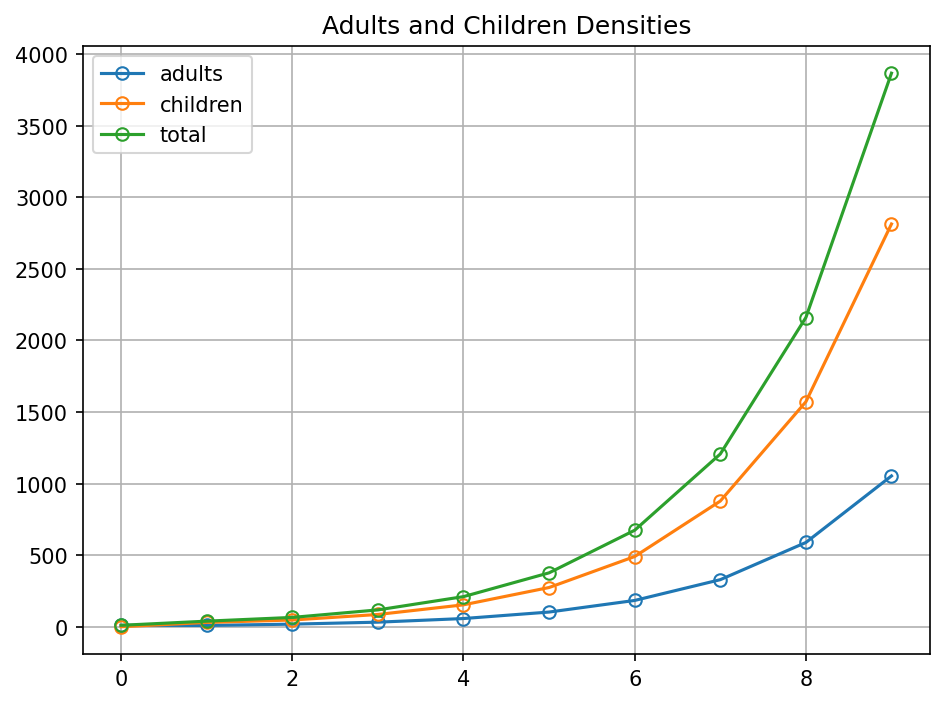

In [1]:
import matplotlib.pyplot as plt
from cmcs.recurrence import Recurrence


def update(y0, alpha, beta, gamma):
    a0, c0 = y0
    a_new = (1 - alpha) * a0 + gamma * c0
    c_new = (1 - gamma) * c0 + beta * a0
    return a_new, c_new


rec = Recurrence(update, 0.1, 3, 1 / 3)
timesteps, (adults, children) = rec([10, 0], 10)
total = adults + children

plt.figure(dpi=150)
plt.title("Adults and Children Densities")
plt.plot(timesteps, adults, marker="o", mfc="none", label="adults")
plt.plot(timesteps, children, marker="o", mfc="none", label="children")
plt.plot(timesteps, total, marker="o", mfc="none", label="total")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


As we can see we obtained an exponential growth, but let's now compute the
equilibrium conditions for this system. For the first recurrence we have

$$A_t = (1 - \alpha) A_t + \gamma C_t$$

that becomes

$$\alpha A_t = \gamma C_t$$

meanwhile for the other we have

$$\gamma C_t = \beta A_t$$

if we now substitute $\gamma C_t$ we obtain that the equilibrium condition is

$$\alpha A_t = \beta A_t \iff \alpha = \beta$$

In other words we have equilibrium if the death rate is equal to the birth rate,
that seems reasonable.


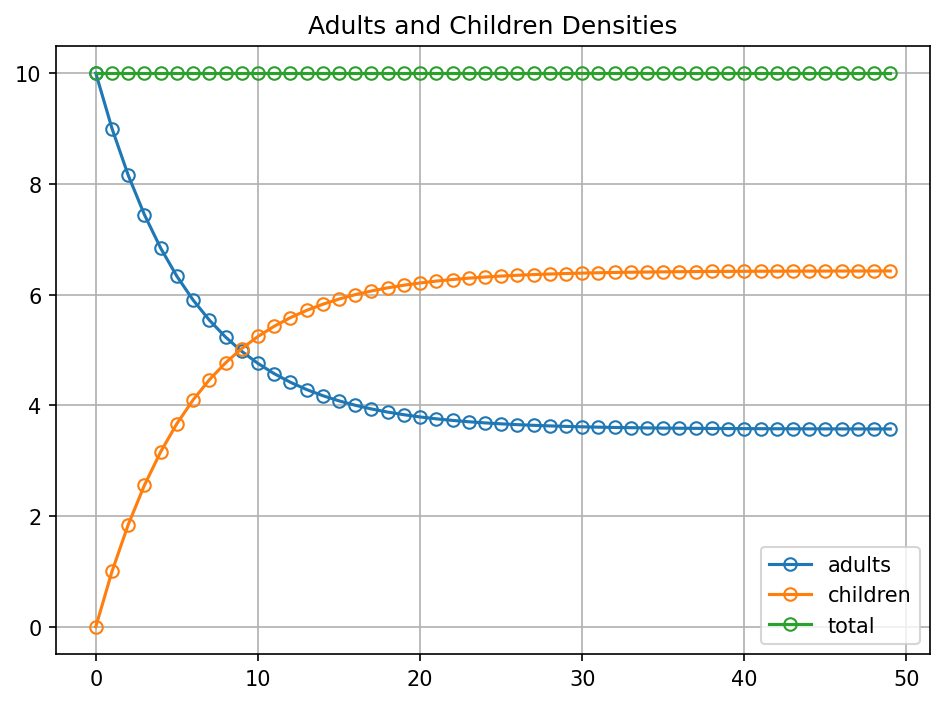

In [2]:
rec.params = 0.1, 0.1, 1 / 18
timesteps, (adults, children) = rec([10, 0], 50)
total = adults + children

plt.figure(dpi=150)
plt.title("Adults and Children Densities")
plt.plot(timesteps, adults, marker="o", mfc="none", label="adults")
plt.plot(timesteps, children, marker="o", mfc="none", label="children")
plt.plot(timesteps, total, marker="o", mfc="none", label="total")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


As we can see the total population density remains constant all the time as
expected.
